In [1]:
import pandas as pd
import numpy as np
# import nltk
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv(r"D:\Project (New)\New folder\Daily-News-for-Stock-Market-Prediction\Combined_News_DJIA.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

This label columns is about Dow Jones Industrial Average (DJIA) close value. <br>--> 1 means that Close value stayed the same. <br>--> 0 means close value changed.

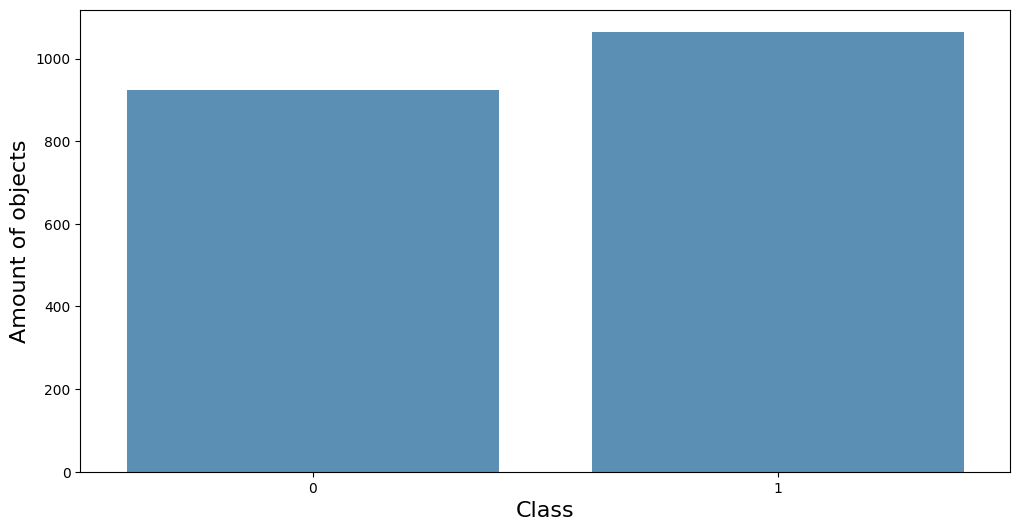

In [3]:
# Plot the Labels distribution
plt.figure(figsize=(12,6))
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
sns.barplot(data=label_counts, x='Label', y='Count', alpha=0.8)
plt.ylabel('Amount of objects', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.show();

In [4]:
df['Label'].value_counts()

Label
1    1065
0     924
Name: count, dtype: int64

We have an almost equal class balance in the whole dataset.

Text(0.5, 1.0, 'Distribution of Headline Length (words)')

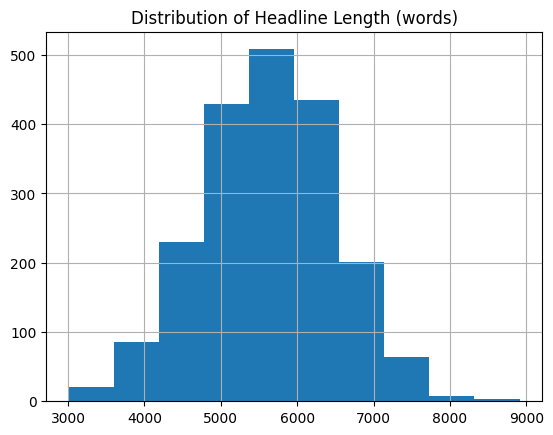

In [38]:
# Let 's calculate the histogram of the length of the headlines
df['headlines'] = df[df.columns[2:]].apply(lambda x: '. '.join(x.dropna().astype(str)),axis=1)
df['comment_length'] = df['headlines'].apply(lambda x : len(x))
df['comment_length'].hist()
plt.title('Distribution of Headline Length (words)')

In [39]:
df = df.drop('headlines', axis=1)

In [5]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

The null values are few so we will just drop them.

In [6]:
df.dropna(subset=['Top23','Top24','Top25'], inplace=True)

In [7]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [8]:
df.shape

(1986, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1986 non-null   object
 1   Label   1986 non-null   int64 
 2   Top1    1986 non-null   object
 3   Top2    1986 non-null   object
 4   Top3    1986 non-null   object
 5   Top4    1986 non-null   object
 6   Top5    1986 non-null   object
 7   Top6    1986 non-null   object
 8   Top7    1986 non-null   object
 9   Top8    1986 non-null   object
 10  Top9    1986 non-null   object
 11  Top10   1986 non-null   object
 12  Top11   1986 non-null   object
 13  Top12   1986 non-null   object
 14  Top13   1986 non-null   object
 15  Top14   1986 non-null   object
 16  Top15   1986 non-null   object
 17  Top16   1986 non-null   object
 18  Top17   1986 non-null   object
 19  Top18   1986 non-null   object
 20  Top19   1986 non-null   object
 21  Top20   1986 non-null   object
 22  Top21   1986 non-null   objec

In [10]:
df.duplicated().sum()

np.int64(0)

According to the Dataset publisher on Kaggle older data is better to used as training set (2008-08-08 to 2014-12-31) and newer data for test set (from 2015-01-02 to 2016-07-01).<br> This recommendation roughly 80%/20% split.

In [11]:
# Define the test and training data
df_train = df[df['Date'] < '2015-01-01']
df_test = df[df['Date'] > '2014-12-31']
print(f"Training length is: {len(df_train)} \nTesting length is: {len(df_test)}")

Training length is: 1608 
Testing length is: 378


In [12]:
# We need to see the whole text on the dataframe that 's why we need to display.max_colwidth
pd.set_option('display.max_colwidth', None)

# Let 's just visualize a sample of what 's going on with these headers
display(df_train.head(4).iloc[:, 2:4])

,Top1,Top2
0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.'
1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict'
2,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'"""
3,b' U.S. refuses Israel weapons to attack Iran: report',"b""When the president ordered to attack Tskhinvali [the capital of South Ossetia], we knew then we were doomed. How come he didn't realize that?"""


## Preprocessing

Steps that we need to follow:<br>

a) Lowercasing the data.<br>

b) Remove Puntuations.<br>

c) Remove stopwords. Why we need to remove the stopwords?<br>
 _Stop words are only for sentence formation but in the meaning of the sentence, stop words are not important. Examples of stopwords are 'the', 'is', 'and' etc._

d) Remove emojis, HTML Tags , ChatWords. It is really unexpected to get emojis and ChatWords on reddit headings but we should implement a function to be ensure accurate analysis and text understanding.

e) _Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation._

d) Apply Lemmatization instead of Stemming as in that way we can use deep learning / embeddings (Word2Vec, BERT)._Lemmatization reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis._

In [ ]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
import re, string

stopwords_list = stopwords.words('english')
translator = str.maketrans('', '', string.punctuation)
emoji_pattern = re.compile("[" 
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_data(dataset):
    data = dataset.copy()
    
    for col in data.columns[2:27]:
        def process_text(text):
            if not isinstance(text, str):
                return []
            text = text[1:] 
            text = text.lower()
            text = text.translate(translator)
            text = emoji_pattern.sub('', text)
            text = re.sub('<.*?>', '', text)
            tokens = word_tokenize(text)
            tokens = [t for t in tokens if t not in stopwords_list]
            # Lemmatize
            pos_tags = pos_tag(tokens)
            tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

            return tokens

        data[col] = data[col].apply(process_text)
    
    return data
clean_data(df)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"[georgia, down, two, russian, warplane, country, move, brink, war]","[break, musharraf, impeach]","[russia, today, columns, troop, roll, south, ossetia, footage, fight, youtube]","[russian, tank, move, towards, capital, south, ossetia, reportedly, completely, destroyed, georgian, artillery, fire]","[afghan, child, rap, impunity, un, official, say, sick, three, year, old, rap, nothing]","[150, russian, tank, enter, south, ossetia, whilst, georgia, shoot, two, russian, jet]","[break, georgia, invades, south, ossetia, russia, warn, would, intervene, sos, side]","[enemy, combatent, trial, nothing, sham, salim, haman, sentence, 5, 12, year, keep, long, anyway, feel, like]",...,"[georgia, invades, south, ossetia, russia, get, involve, nato, absorb, georgia, unleash, full, scale, war]","[alqaeda, face, islamist, backlash]","[condoleezza, rice, u, would, act, prevent, israeli, strike, iran, israeli, defense, minister, ehud, barak, israel, prepare, uncompromising, victory, case, military, hostility]","[busy, day, european, union, approve, new, sanction, iran, protest, nuclear, programme]","[georgia, withdraw, 1000, soldier, iraq, help, fight, russian, force, georgias, breakaway, region, south, ossetia]","[pentagon, think, attack, iran, bad, idea, u, news, amp, world, report]","[caucasus, crisis, georgia, invades, south, ossetia]","[indian, shoe, manufactory, series, like, work]","[visitor, suffer, mental, illness, ban, olympics]","[help, mexicos, kidnapping, surge]"
1,2008-08-11,1,"[wont, america, nato, help, u, wont, help, u, help, iraq]","[bush, put, foot, georgian, conflict]","[jewish, georgian, minister, thanks, israeli, train, fending, russia]","[georgian, army, flees, disarray, russian, advance, gori, abandon, russia, without, shot, fire]","[olympic, open, ceremony, firework, fake]","[mossad, fraudulent, new, zealand, passport, iraq]","[russia, anger, israeli, military, sale, georgia]","[american, citizen, live, sossetia, blame, u, georgian, leader, genocide, innocent, people]",...,"[israel, u, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much, victim]","[riot, still, go, montreal, canada, police, murder, boy, saturday]","[china, overtake, u, large, manufacturer]","[war, south, ossetia, pic]","[israeli, physician, group, condemn, state, torture]","[russia, beaten, united, state, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, well, war]","[come, trading, sex, food]"
2,2008-08-12,0,"[remember, adorable, 9yearold, sang, open, ceremony, fake]","[russia, end, georgia, operation]","[sexual, harassment, would, child]","[alqaeda, lose, support, iraq, brutal, crackdown, activity, regard, unislamic, include, woman, buy, cucumber]","[ceasefire, georgia, putin, outmaneuvers, west]","[microsoft, intel, try, kill, xo, 100, laptop]","[stratfor, russogeorgian, war, balance, power]","[im, try, get, sense, whole, georgiarussia, war, vote, think, georgia, start, think, russia]",...,"[u, troop, still, georgia, know, georgia, first, place]","[russias, response, georgia, right]","[gorbachev, accuse, u, make, serious, blunder, pursue, interest, caucasus, region]","[russia, georgia, nato, cold, war, two]","[remember, adorable, 62yearold, led, country, war, base, evidence, fake]","[war, georgia, israeli, connection]","[sign, point, u, encouraging, georgia, invade, south, ossetia, goddamnit, bush]","[christopher, king, argues, u, nato, behind, georgian, invasion, south, ossetia, misjudge, russian, resolve]","[america, new, mexico]","[bbc, news, asiapacific, extinction, man, climate]"
3,2008-08-13,0,"[u, refuse, israel, weapon, attack, iran, report]","[president, order, attack, tskhinvali, capital, south, ossetia, knew, doom, come, didnt, realize]","[israel, clear, troop, kill, reuters, cameraman]","[britain, policy, tough, drug, pointless, say, former, civil, se

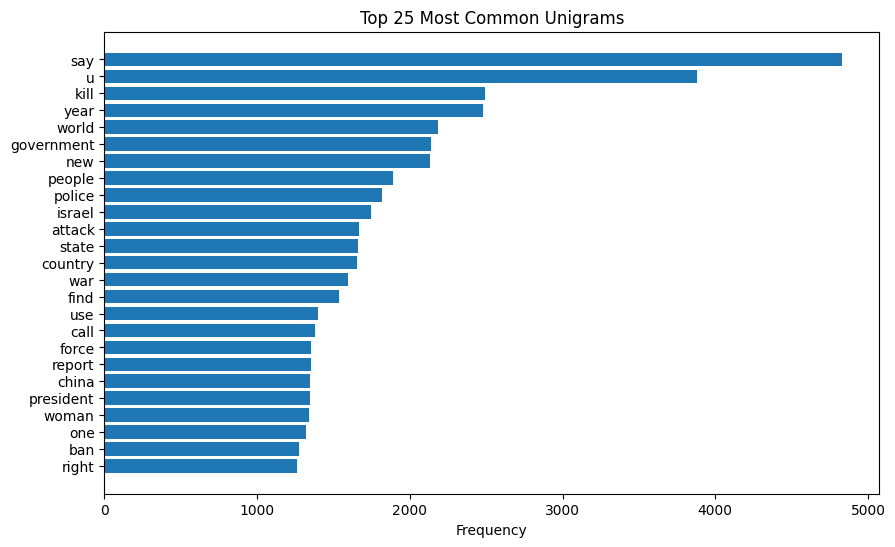

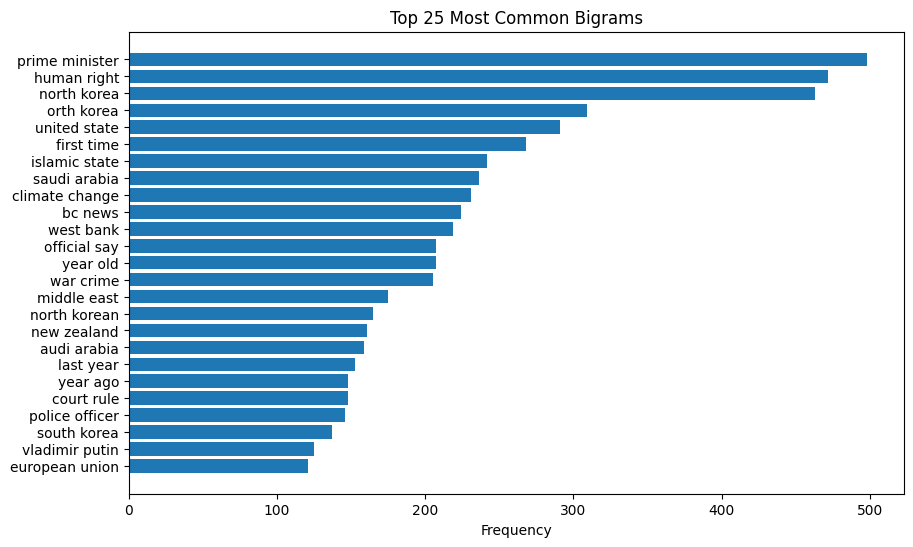

In [40]:
from itertools import chain

# Clean the data
df_clean = clean_data(df)

# Combine all tokens from text columns
all_tokens = list(
    chain.from_iterable(
        df_clean[df_clean.columns[2:27]].values.flatten()
    )
)

# Remove empty tokens just in case
all_tokens = [t for t in all_tokens if isinstance(t, str)]
from collections import Counter
import matplotlib.pyplot as plt

unigram_freq = Counter(all_tokens)
top_25_unigrams = unigram_freq.most_common(25)

words, counts = zip(*top_25_unigrams)

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], counts[::-1])
plt.title("Top 25 Most Common Unigrams")
plt.xlabel("Frequency")
plt.show()
from nltk.util import bigrams

bigram_tokens = list(bigrams(all_tokens))
bigram_freq = Counter(bigram_tokens)

top_25_bigrams = bigram_freq.most_common(25)

bigrams_words = [' '.join(b) for b, _ in top_25_bigrams]
bigram_counts = [count for _, count in top_25_bigrams]

plt.figure(figsize=(10, 6))
plt.barh(bigrams_words[::-1], bigram_counts[::-1])
plt.title("Top 25 Most Common Bigrams")
plt.xlabel("Frequency")
plt.show()


# Words Embedding Techniques
Word embedding techniques provide a way to represent words as vectors in a continuous vector space. Word embeddings are numerical representations of words that show semantic similarities and correlations depending on how frequently they appear in a given dataset.<br> Through the conversion of words into continuous vector spaces, these representations enable machines to interpret and analyze human language with greater efficiency.

There are two major types of word Embeddings:

- The Frequency Bsed Embeddings (Bag Of Words, TF-IDF)
    - Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies.<br> It discards the word order and captures the frequency of each word in the document, creating a vector representation. 

    - Term Frequency-Inverse Document Frequency, commonly known as TF-IDF, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).

- Prediction Based Embeddings (Word2Vec)

    - Word2Vec  is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under <br> the category of distributed representation models. There are two neural embedding methods for Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram.
    
        - Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target <br> word based on its context, which consists of the surrounding words in a given window.

        - The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words <br> (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model, where the objective is to predict the target word based on its context

# Bow (Bag Of Words)

In [14]:
import pandas as pd

# Create a corpus of these headings

def concat_headings(df):
    topic_cols = [f"Top{i}" for i in range(1, 26)]  

    # Convert actual bytes → UTF-8 strings
    for col in topic_cols:
        df[col] = df[col].apply(
            lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x)
        )

    # Concatenate all Top1…Top25 into one text string
    df["text"] = df[topic_cols].apply(
        lambda row: " ".join(x for x in row if isinstance(x, str)),
        axis=1
    )

    # Keep only Label, Date, and new text
    df_final = df[["Label", "Date", "text"]]

    return df_final

In [15]:
# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))

In [16]:
print(f'Shape of training data:{df_train_conc.shape}')
print(f'Shape of testing data: {df_test_conc.shape}')

Shape of training data:(1608, 3)
Shape of testing data: (378, 3)


In [17]:
# Get only the text column
df_train_conc=df_train_conc['text']
df_test_conc=df_test_conc['text']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer : Converts a collection of text documents to a matrix of token counts.
# Create and object for countvectorizer
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(df_train_conc)
print(f'The shape of the train data after the counter vectorization are :{basictrain.shape}\n')

basictest = basicvectorizer.transform(df_test_conc)
print(f'The shape of the test data after the transformation are :{basictest.shape}')

The shape of the train data after the counter vectorization are :(1608, 33648)

The shape of the test data after the transformation are :(378, 33648)


So what we 've got here?<br> For training data we have 1608 different rows and there are 33648 different words.<br> So we after this transformation (words --> vectors) we can apply classification algorithms.

In [19]:
from sklearn.linear_model import LogisticRegression
basicmodel = LogisticRegression()
# Train the logistic regression on the training data
basicmodel = basicmodel.fit(basictrain, df_train["Label"]) 
# Be carefull on this stage the basic train has only the text data! that why i took df_train['Label'] separate.
basictest = basicvectorizer.transform(df_test_conc)
predictions = basicmodel.predict(basictest)
y_true = df_test["Label"]
y_pred = predictions

In [20]:
# Metrics for this logistic regression is 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, average='weighted'))
print("Recall: ", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_true, y_pred, average='weighted'))

Accuracy:  0.455026455026455
Precision:  0.45129352955439916
Recall:  0.455026455026455
F1 Score:  0.44856168952998987



Confusion Matrix:



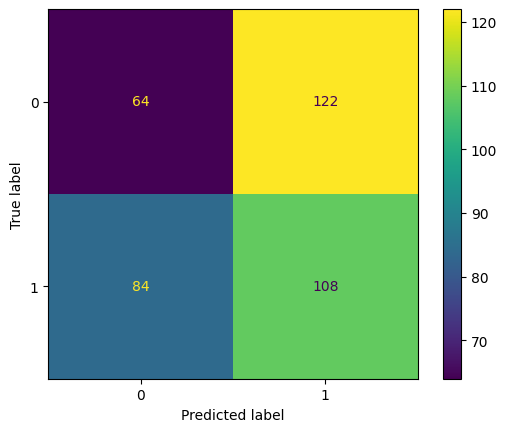

In [21]:
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_true, y_pred, labels=basicmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=basicmodel.classes_)
disp.plot()
plt.show()

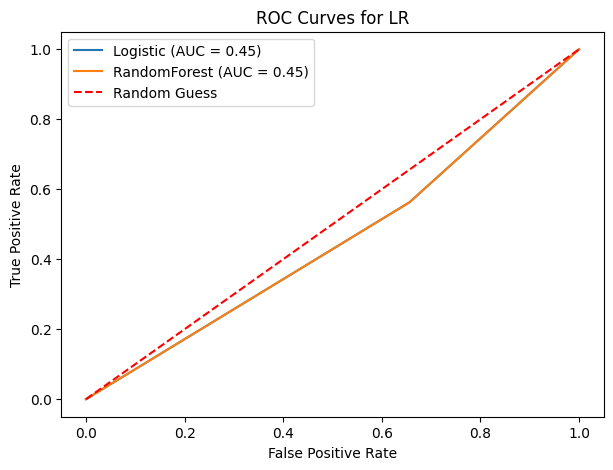

In [22]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LR')
plt.legend()
plt.show()

In [23]:
basicwords = basicvectorizer.get_feature_names_out()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Word,Coefficient
13560,green,0.501855
25336,rench,0.491580
6851,chemical,0.478597
18227,london,0.472808
8216,create,0.453771
20092,mumbai,0.441561
27019,scrap,0.439899
20734,nigeria,0.436409
1337,45,0.421410
25371,reopen,0.419678


Bag Of Word Drawbacks: 
- Ordering of the words in the sentences is getting changes. So different sentences have the same meaning.
- Out of vocabulary issue. A new word cannot become a vector easily.
- Semantic meaning is not get capture (we cannot understand which word is more crucial than others).

# TF-IDF

In [24]:
# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))

In [25]:
# # Keep only the headings
df_train_conc=df_train_conc['text']
df_test_conc=df_test_conc['text']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

sec_vectorizer = TfidfVectorizer(min_df=0.03, max_df= 0.97,strip_accents= 'unicode') # remove words with frequence lower than 3%.
advancedtrain  = sec_vectorizer.fit_transform(df_train_conc)
print(f'The shape of the train data after the TFI-DF vectorization are :{advancedtrain.shape}\n')

basictest = sec_vectorizer.transform(df_test_conc)
print(f'The shape of the test data after the TFI-DF transformation are :{basictest.shape}')

The shape of the train data after the TFI-DF vectorization are :(1608, 1689)

The shape of the test data after the TFI-DF transformation are :(378, 1689)


In [27]:
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Models i 'll use to classify the data
models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "xgboost":XGBClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(), 
    'lightgbm':LGBMClassifier(),
    'LogisticRegression':LogisticRegression()
}   


# Create param grids for every and each of these algorithms
# Decision Tree Hyperparameters
params = {
"Decision Tree" : {  
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 10,20],
    'min_samples_split':[5, 10],
    'min_samples_leaf':[1,4,5]
},

# Random Forest Hyperparameters
"Random Forest" : {
    'n_estimators':[100],
    'max_depth':[2, 5],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[2,10]
    },

# AdaBoost hyperparameters
"AdaBoost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1]
},

# Gradient Boosthyperparameters
"Gradient Boost" :{
    'learning_rate':[0.05,0.1],
    'n_estimators':[100],
    "max_depth": [2, 5]
},

# Xgboost hyperparameters
"xgboost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1],
    'max_depth':[2, 5]
},

# SVM hyperparameters
"SVM":{
    'C': [0.1, 1, 10], # regularization parameter
    'kernel':['linear','poly','sigmoid'],
    'gamma': [1, 0.1]
},
# KNN hyperparameters
'KNN' :{
    'n_neighbors':[3,5]
},

# lightgbm hyperparameters
"lightgbm": {
    "n_estimators": [100],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31], # this is the default value
    'max_depth':[-1] 
},

# Logistic Regression hyperparameters
"LogisticRegression": {
    "C": [0.1, 1, 10],
    "penalty": ['l1',"l2",'elasticnet']
}
}


Start tuning the Random Forest

The best cross validation score for the Random Forest is : 0.7024633431085044



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



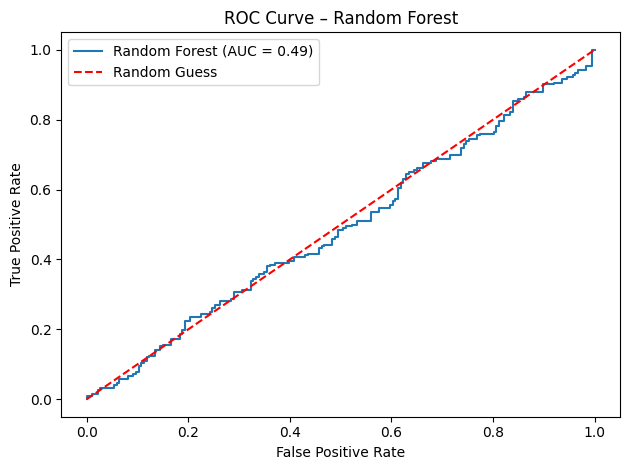

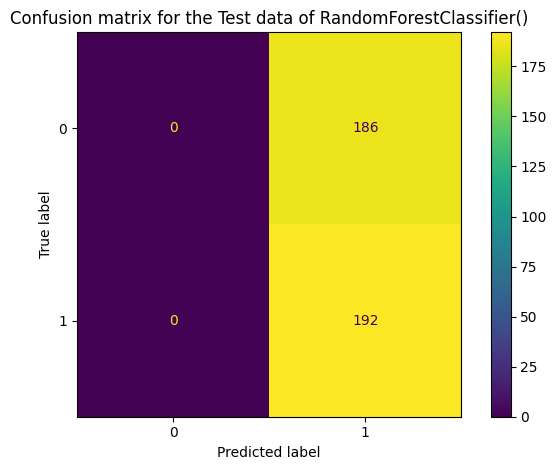

Start tuning the AdaBoost

The best cross validation score for the AdaBoost is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



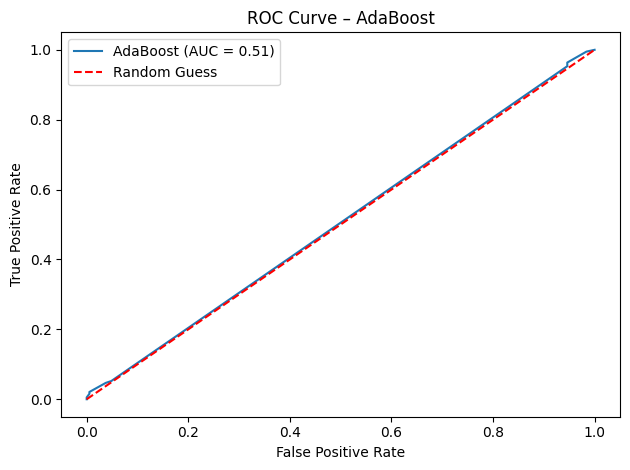

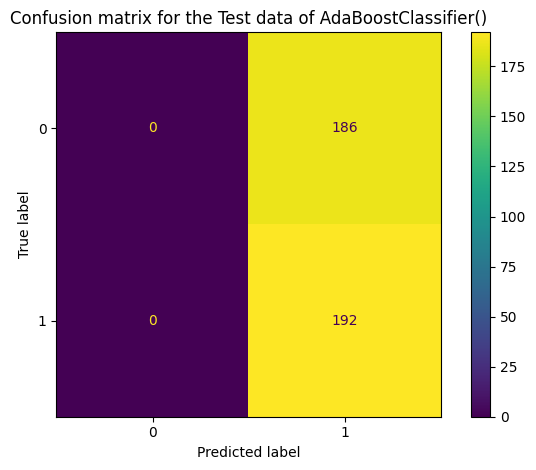

Start tuning the Gradient Boost

The best cross validation score for the Gradient Boost is : 0.6279751681382408



Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.15      0.22       186
           1       0.50      0.83      0.62       192

    accuracy                           0.49       378
   macro avg       0.47      0.49      0.42       378
weighted avg       0.48      0.49      0.42       378



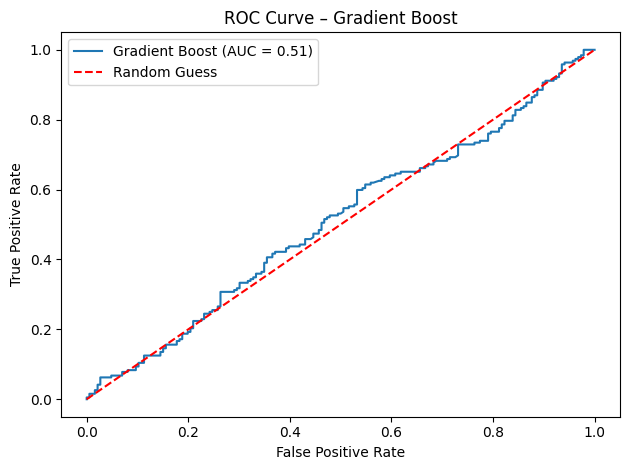

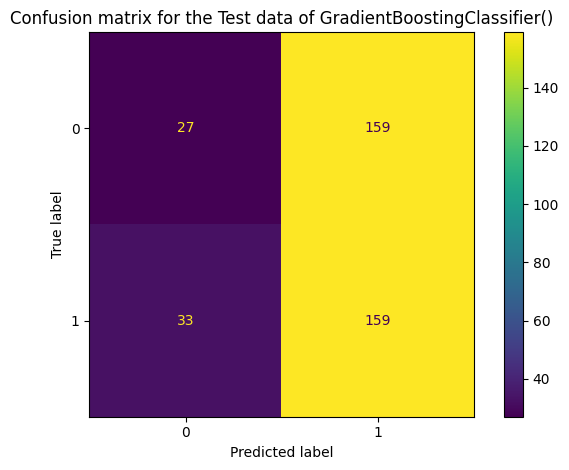

Start tuning the xgboost

The best cross validation score for the xgboost is : 0.6337384119530162



Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.17      0.25       186
           1       0.50      0.81      0.62       192

    accuracy                           0.49       378
   macro avg       0.48      0.49      0.43       378
weighted avg       0.48      0.49      0.44       378



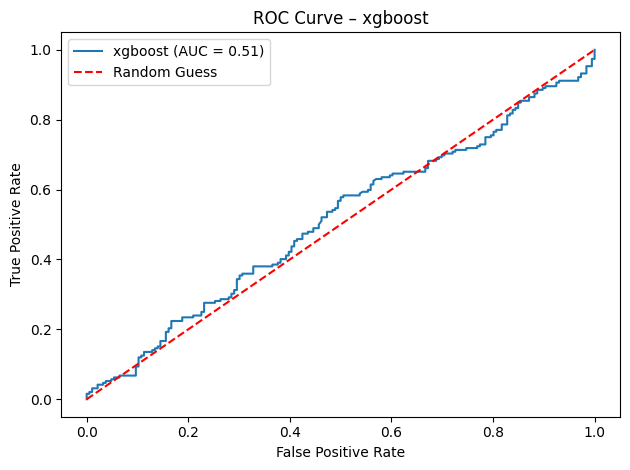

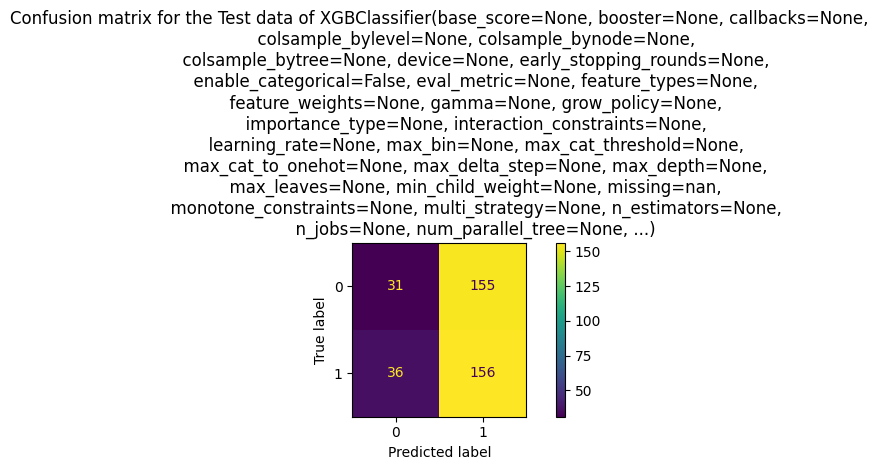

Start tuning the SVM

The best cross validation score for the SVM is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



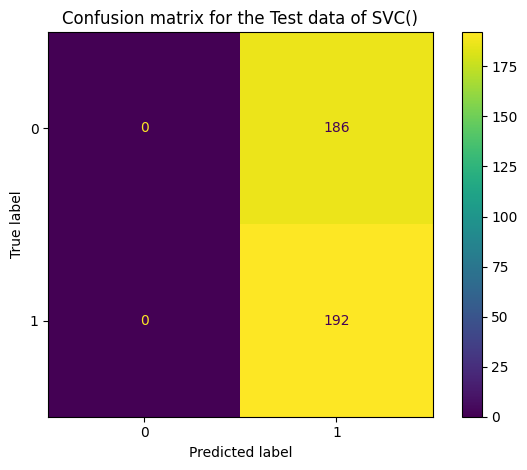

Start tuning the KNN

The best cross validation score for the KNN is : 0.5573664554170352



Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       186
           1       0.52      0.62      0.57       192

    accuracy                           0.52       378
   macro avg       0.51      0.51      0.51       378
weighted avg       0.51      0.52      0.51       378



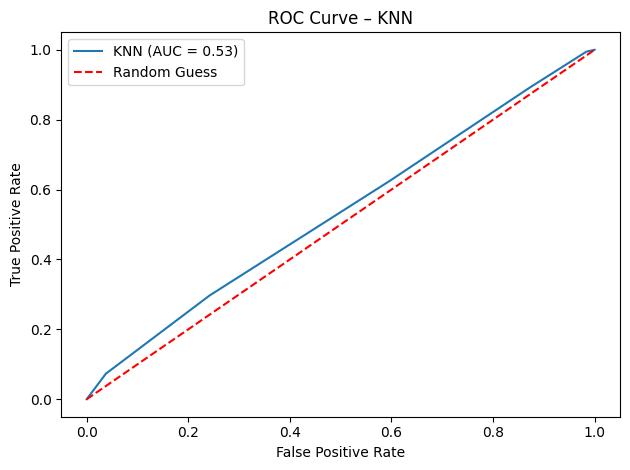

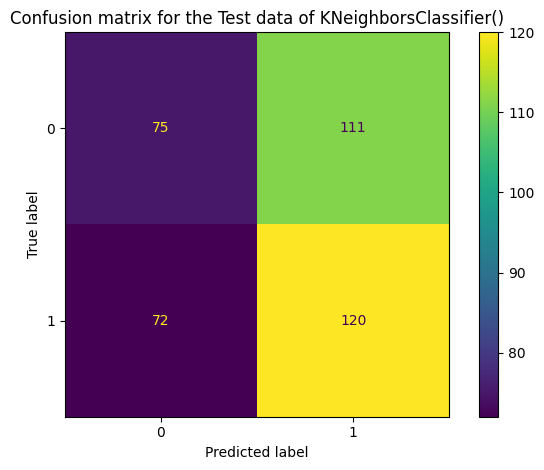

Start tuning the lightgbm
[LightGBM] [Info] Number of positive: 870, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88668
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 1689
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541045 -> initscore=0.164549
[LightGBM] [Info] Start training from score 0.164549

The best cross validation score for the lightgbm is : 0.5820199156333591



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       186
           1       0.51      0.60      0.56       192

    accuracy                           0.51       378
   macro avg       0.51      0.51      0.50       378
weighted avg       0.51      0.51      0.50       378



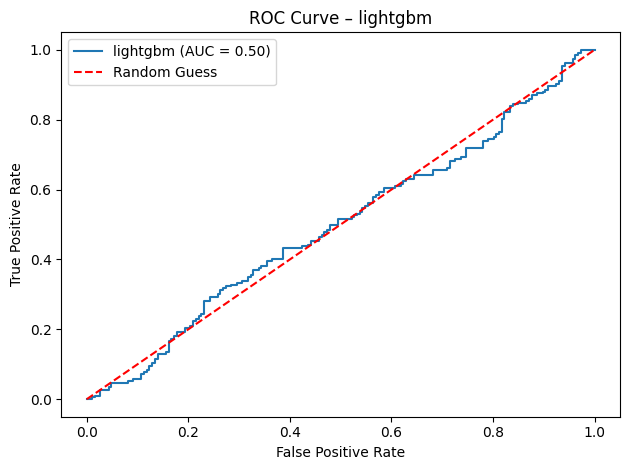

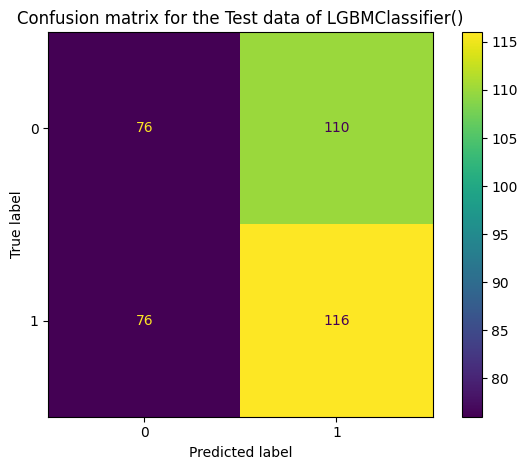

Start tuning the LogisticRegression

The best cross validation score for the LogisticRegression is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



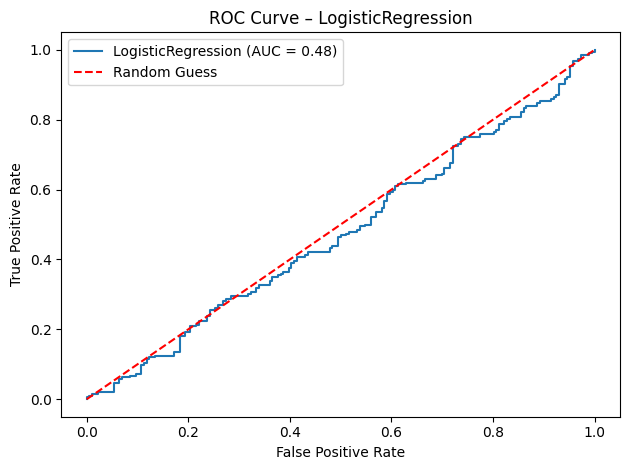

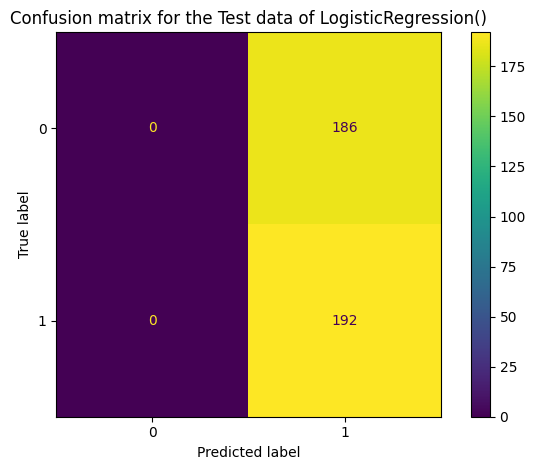

In [28]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score,roc_curve,auc
warnings.filterwarnings("ignore")

# Empty dictionary to save all of the hyperparameter tuning results for each parameter.
result = {}

scoring = {'f1':'f1','accuracy': 'accuracy'}
for model_name, model in models.items():
    print(f"Start tuning the {model_name}") # only for debugging purposes
    clf = model  # get the model
    hype = params[model_name] # get the hyperparameters for hyperparameter tuning
    
    # grid search cv to get the best combination of hyperparameters
    grid  = GridSearchCV(clf,  
                    hype, 
                    scoring='f1', 
                    n_jobs = -1, # To use the whole cpu and get faster results.
                    cv=5).fit(advancedtrain, df_train["Label"])
    
    # update the result dict
    result[model_name] = {
        "best_params": grid.best_params_,
        "best_f1": grid.best_score_,
        "best_model": grid.best_estimator_
    }
    
    print(f'\nThe best cross validation score for the {model_name} is : {grid.best_score_}\n\n')
    best_model = grid.best_estimator_

    # ---- Test set evaluation ----
    y_pred = best_model.predict(basictest)

    print("\nClassification Report:")
    print(classification_report(df_test["Label"], y_pred))

    # ---- ROC / AUC (only if supported) ---- (For example SVM)
    if hasattr(best_model, "predict_proba"):
        y_pred_prob = best_model.predict_proba(basictest)[:, 1]

        fpr, tpr, _ = roc_curve(df_test["Label"], y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve – {model_name}')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    # Plot Confusion matrix on ax[1]
    cm = confusion_matrix(df_test["Label"], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion matrix for the Test data of {model}')
    plt.tight_layout()
    plt.show()
    

What are all of those metrics means ?

- Accuracy is the ratio of correctly predicted instances to the total number of instances.<br>Accuracy is simple to understand and explain, making it ideal for situations in which all classes are equally significant and balanced.

- Precision is the proportion of all the model's positive classifications that are actually positive.

- Recall (The true positive rate), or the proportion of all actual positives that were classified correctly <br> as positives.

- F1 score combines both precision and recall and symmetrically represents them via a harmonic mean.<br> F1 scores can range from 0 to 1, with 1 representing a model that perfectly classifies each observation into the correct class and 0 representing <br> a model that is unable to classify any observation into the correct class.F1-score gives a more comprehensive evaluation, especially in <br> imbalanced datasets, by taking into account both false positives and false negatives.

# Drawbacks of TF-IDF

One limitation of TF-IDF is that it only works with words it has seen during training. So if a new word appears in a test document <br> a word that wasn't in the training corpus it becomes an Out-of-Vocabulary word and gets ignored.

In order to handle the drawbacks from both TF-IDF and Bow we can use Deep Learning Training Models (instead of Count or Frequency models). 

# Deep Learning Training Models (Neural Approach)

- Word2Vec (developed by google researchers) is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models.

    - Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window.

    - The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model.

# CBOW

We will use only the CBOW since the dataset is small.

In [29]:
# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))

In [ ]:
# # Keep only the headings
df_train_conc=df_train_conc['text'] # this is the training text
df_test_conc=df_test_conc['text'] # this is the testing text

In [ ]:
from gensim.models import Word2Vec
import gensim
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# get a copy of the data
data = df.copy()

# Clean the data
data = clean_data(data)

# Create a set(get only unique values) for all of words that are in headings
vocabulary = set(
    chain.from_iterable(
        df_clean[df_clean.columns[2:27]].values.flatten()
    )
)

# Make a list of sentences
sentences = [
    tokens
    for tokens in data[data.columns[2:27]].values.flatten()
    if isinstance(tokens, list) and len(tokens) > 1
]

# instantiate a CBOW model. In CBOW we train the sentences and not the words each self.
model = gensim.models.Word2Vec(sentences, min_count=1,workers=3,
                                vector_size=100, window=5, sg = 0) # we set sg = 0 to train our algorithm as CBOW

# Train the model based on vocabulary
model.train(sentences, total_examples=len(sentences), epochs=200) 

(116510139, 118079000)

- 116,510,139 → number of word occurrences actually used for training

- 118,079,000 → total number of word occurrences seen

In [76]:
len(sentences)

49645

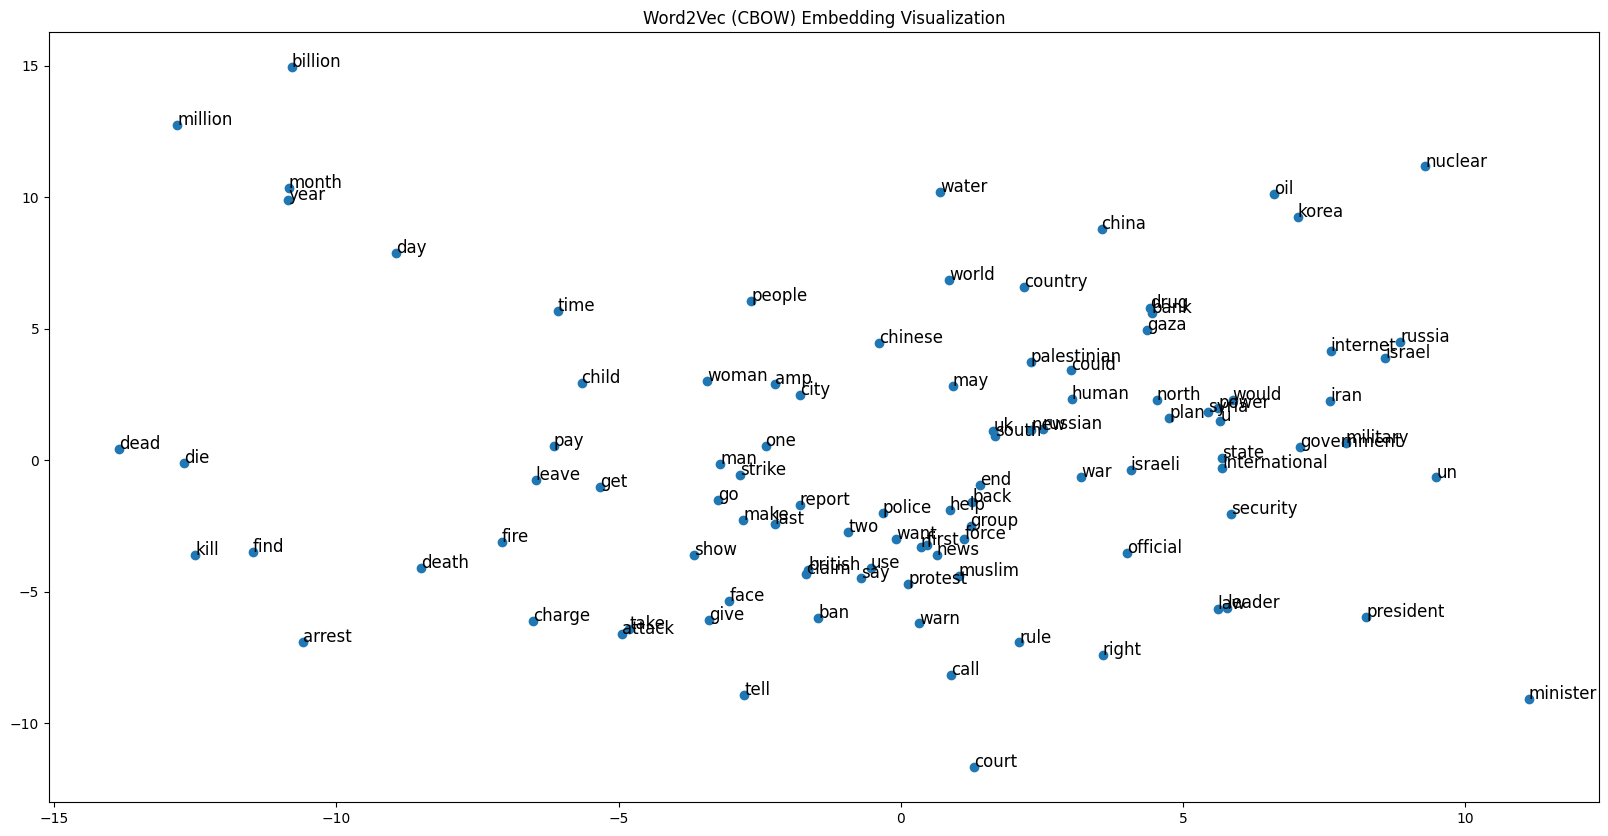

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only 50 random words to visualize since the whole vocabulary is not interpretable
words = list(model.wv.key_to_index.keys())[:100]

# Save each words vector in an array 
X = np.array([model.wv[word] for word in words])

# PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word2Vec (CBOW) Embedding Visualization")
plt.show()

In [91]:
# Let 's just do few experiments
model.wv.most_similar('year')

[('month', 0.8471162915229797),
 ('day', 0.7231959104537964),
 ('week', 0.7231240272521973),
 ('minute', 0.6317412853240967),
 ('yr', 0.6144541501998901),
 ('decade', 0.6030252575874329),
 ('hour', 0.573184609413147),
 ('yrs', 0.5519769191741943),
 ('hr', 0.4916622042655945),
 ('age', 0.49073126912117004)]

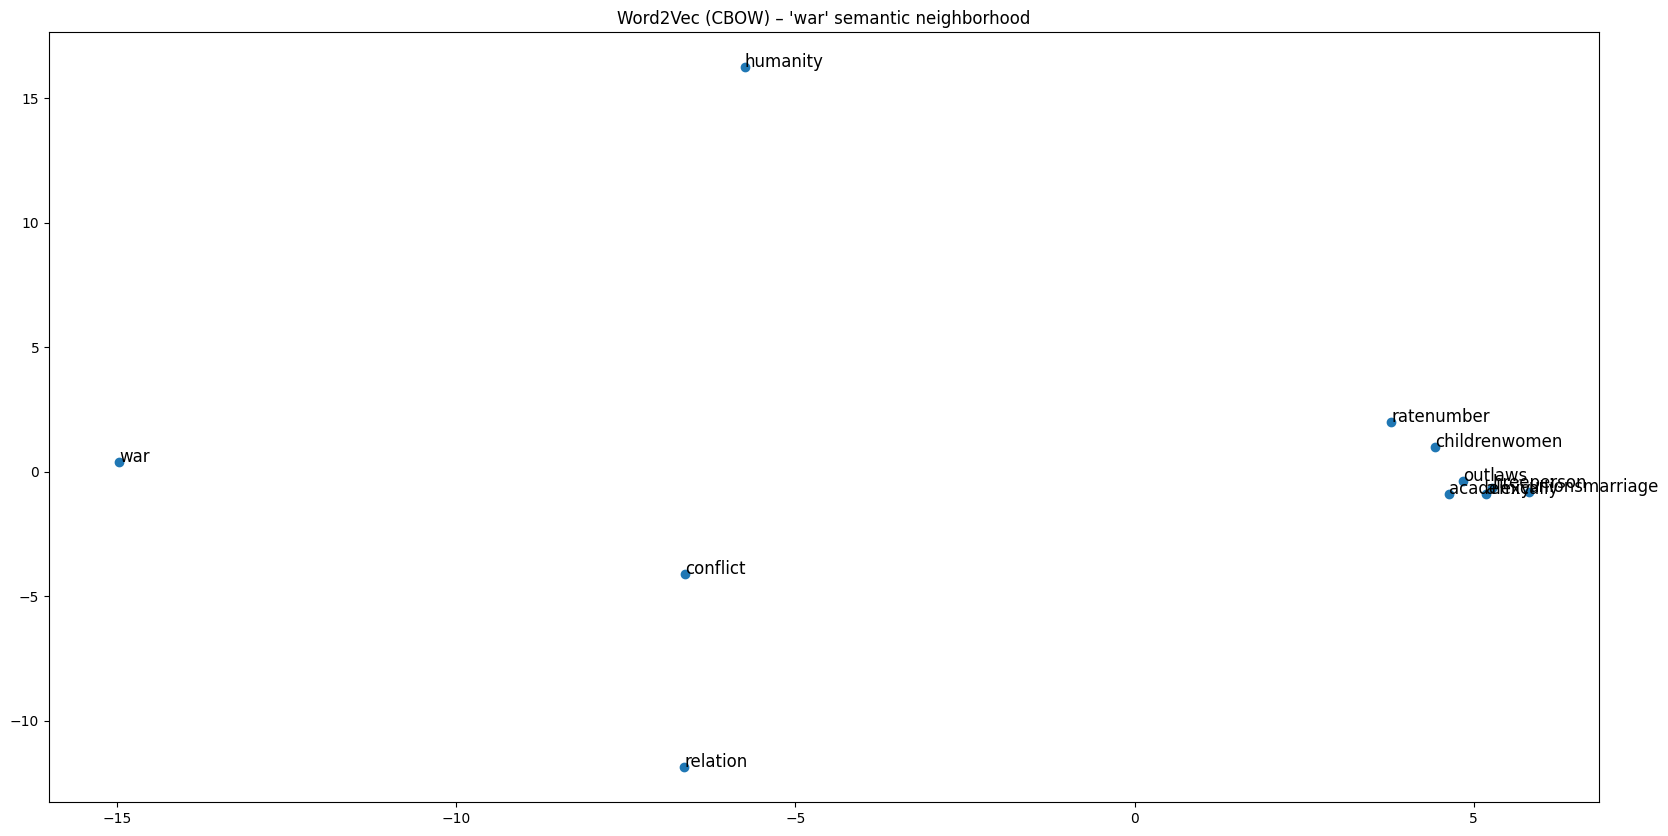

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
similar_words = model.wv.most_similar("war", topn=10)
words = ["war"] + [w for w, _ in similar_words]

X = np.array([model.wv[word] for word in words])

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word2Vec (CBOW) – 'war' semantic neighborhood")
plt.show()